In [185]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

from metrics.patch_intersection import patch_iou

In [285]:
def get_stored_explanation(class_name, technique, model='vgg19', patch=False, idx=1):
    result_path = os.path.join('../results/explanation_examples/'+class_name+'/'+class_name+str(idx)+'/')
    if idx==None:
        result_path = os.path.join('../results/explanation_examples/'+class_name+'/')
    print(result_path)
    if patch:
        result_path = os.path.join(result_path+'patch/')
        orig_img_path = glob.glob(result_path + 'patch_image*')
    if not patch:
        orig_img_path = glob.glob(result_path+'original*')
    list.sort(orig_img_path)
    expl_mask = glob.glob(result_path+technique+'*')
    print('image path: {0}  \nexplanation path: {1}'.format(orig_img_path[0], expl_mask[0]))
    expl_mask = np.load(expl_mask[0])
    base_img = np.load(orig_img_path[0])
    heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8((expl_mask/np.max(expl_mask)) * 255.0), cv2.COLORMAP_JET), cv2.COLOR_BGR2RGB)
    cam = heatmap + np.float32(base_img*255)
    cam = cam / np.max(cam)
    plt.imshow(cam)
    return base_img, expl_mask, cam

def plot_all_expl(class_name, patch=False, idx=1):
    f, axarr = plt.subplots(2,2,figsize=(10,10))
    for technique, index in zip(['gcam', 'lime', 'rise', 'ig'], [axarr[0,0], axarr[0,1], axarr[1,0], axarr[1,1]]):
        base_img, expl_mask, cam = get_stored_explanation(class_name, technique, patch=patch, idx=idx)
        if patch:
            for thresh in [15, 25, 50]:
                print("{0} pixel iou thresh {1}: {2}".format(technique, thresh, patch_iou(expl_mask, threshold = thresh)))
            print('---------------')
        index.imshow(cam)
        index.set_title(technique)

../results/explanation_examples/trifle/trifle1/
image path: ../results/explanation_examples/trifle/trifle1/original_img.npy  
explanation path: ../results/explanation_examples/trifle/trifle1/gcam-vgg19.npy
../results/explanation_examples/trifle/trifle1/
image path: ../results/explanation_examples/trifle/trifle1/original_img.npy  
explanation path: ../results/explanation_examples/trifle/trifle1/lime-vgg19.npy
../results/explanation_examples/trifle/trifle1/
image path: ../results/explanation_examples/trifle/trifle1/original_img.npy  
explanation path: ../results/explanation_examples/trifle/trifle1/rise-vgg19.npy
../results/explanation_examples/trifle/trifle1/
image path: ../results/explanation_examples/trifle/trifle1/original_img.npy  
explanation path: ../results/explanation_examples/trifle/trifle1/ig-vgg19.npy


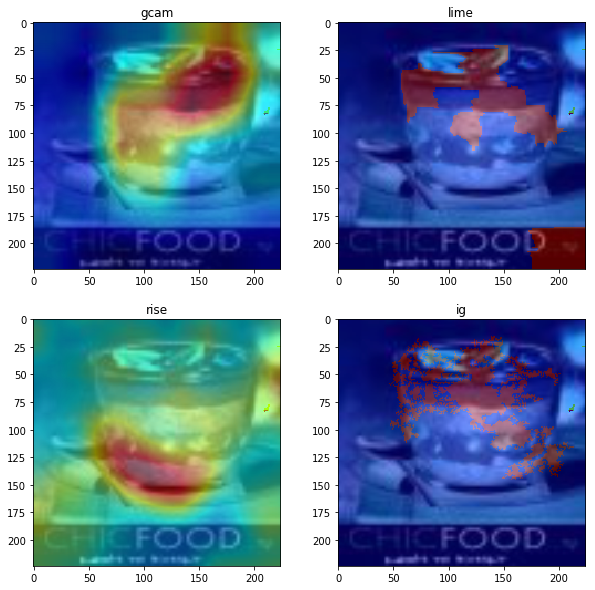

In [273]:
plot_all_expl('trifle', patch=False)

../results/explanation_examples/cuirass/cuirass1/
image path: ../results/explanation_examples/cuirass/cuirass1/original_img.npy  
explanation path: ../results/explanation_examples/cuirass/cuirass1/gcam-vgg19.npy
../results/explanation_examples/cuirass/cuirass1/
image path: ../results/explanation_examples/cuirass/cuirass1/original_img.npy  
explanation path: ../results/explanation_examples/cuirass/cuirass1/lime-vgg19.npy
../results/explanation_examples/cuirass/cuirass1/
image path: ../results/explanation_examples/cuirass/cuirass1/original_img.npy  
explanation path: ../results/explanation_examples/cuirass/cuirass1/rise-vgg19.npy
../results/explanation_examples/cuirass/cuirass1/
image path: ../results/explanation_examples/cuirass/cuirass1/original_img.npy  
explanation path: ../results/explanation_examples/cuirass/cuirass1/ig-vgg19.npy


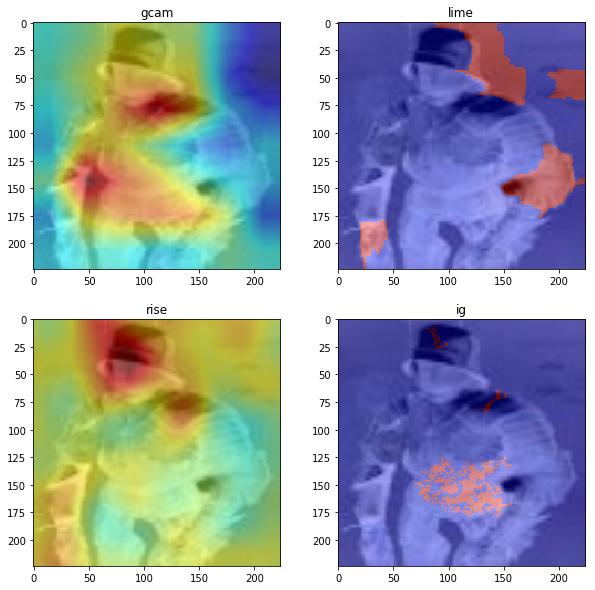

In [274]:
plot_all_expl('cuirass', patch=False)

../results/explanation_examples/theater_curtain/theater_curtain2/
image path: ../results/explanation_examples/theater_curtain/theater_curtain2/original_img.npy  
explanation path: ../results/explanation_examples/theater_curtain/theater_curtain2/gcam-vgg19.npy
../results/explanation_examples/theater_curtain/theater_curtain2/
image path: ../results/explanation_examples/theater_curtain/theater_curtain2/original_img.npy  
explanation path: ../results/explanation_examples/theater_curtain/theater_curtain2/lime-vgg19.npy
../results/explanation_examples/theater_curtain/theater_curtain2/
image path: ../results/explanation_examples/theater_curtain/theater_curtain2/original_img.npy  
explanation path: ../results/explanation_examples/theater_curtain/theater_curtain2/rise-vgg19.npy
../results/explanation_examples/theater_curtain/theater_curtain2/
image path: ../results/explanation_examples/theater_curtain/theater_curtain2/original_img.npy  
explanation path: ../results/explanation_examples/theater_

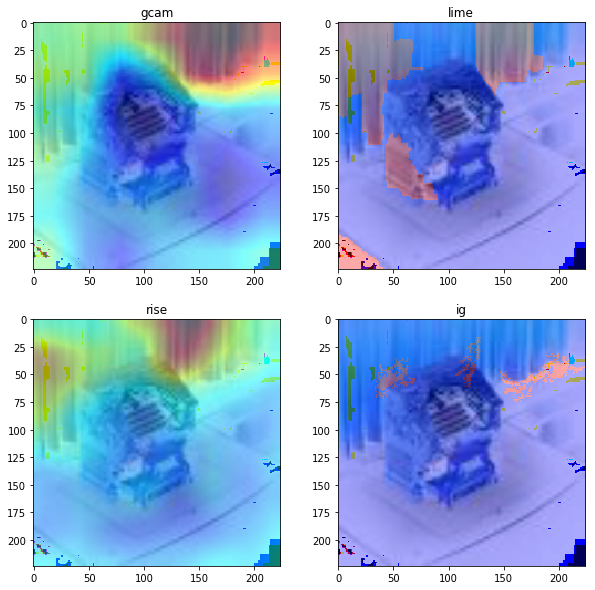

In [278]:
plot_all_expl('theater_curtain', idx=2)

../results/explanation_examples/African_hunting_dog/African_hunting_dog1/
image path: ../results/explanation_examples/African_hunting_dog/African_hunting_dog1/original_img.npy  
explanation path: ../results/explanation_examples/African_hunting_dog/African_hunting_dog1/gcam-vgg19.npy
../results/explanation_examples/African_hunting_dog/African_hunting_dog1/
image path: ../results/explanation_examples/African_hunting_dog/African_hunting_dog1/original_img.npy  
explanation path: ../results/explanation_examples/African_hunting_dog/African_hunting_dog1/lime-vgg19.npy
../results/explanation_examples/African_hunting_dog/African_hunting_dog1/
image path: ../results/explanation_examples/African_hunting_dog/African_hunting_dog1/original_img.npy  
explanation path: ../results/explanation_examples/African_hunting_dog/African_hunting_dog1/rise-vgg19.npy
../results/explanation_examples/African_hunting_dog/African_hunting_dog1/
image path: ../results/explanation_examples/African_hunting_dog/African_hu

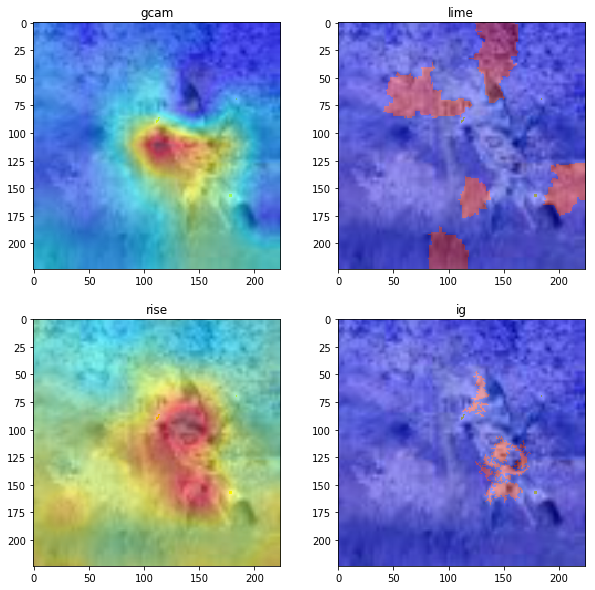

In [279]:
plot_all_expl('African_hunting_dog', idx=1)

../results/explanation_examples/African_hunting_dog/
image path: ../results/explanation_examples/African_hunting_dog/patch/patch_image-2019-11-13-04-14.png.npy  
explanation path: ../results/explanation_examples/African_hunting_dog/patch/gcam-vgg19-2019-11-13-04-14.npy
gcam pixel iou thresh 15: 0.544174305832337
gcam pixel iou thresh 25: 0.3250535671772082
gcam pixel iou thresh 50: 0.16326530612244897
---------------
../results/explanation_examples/African_hunting_dog/
image path: ../results/explanation_examples/African_hunting_dog/patch/patch_image-2019-11-13-04-14.png.npy  
explanation path: ../results/explanation_examples/African_hunting_dog/patch/lime-vgg19-2019-11-13-04-16.npy
lime pixel iou thresh 15: 0.8007820136852395
lime pixel iou thresh 25: 0.8007820136852395
lime pixel iou thresh 50: 0.8007820136852395
---------------
../results/explanation_examples/African_hunting_dog/
image path: ../results/explanation_examples/African_hunting_dog/patch/patch_image-2019-11-13-04-14.png.np

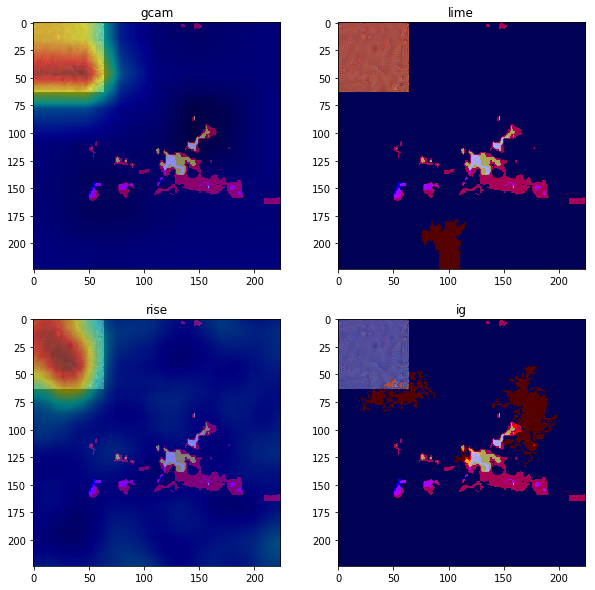

In [286]:
plot_all_expl('African_hunting_dog', idx=None, patch=True)